<a href="https://colab.research.google.com/github/Davjot/Image-Classification-using-CNN/blob/main/Image_Classification_With_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION WITH CNN

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

**Load the dataset**

In [2]:
(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
#printing the array in 1D
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
# similarly for y_test
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(x, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

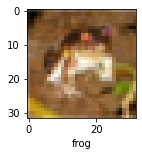

In [13]:
plot_sample(x_train, y_train, 0)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

**Normalising the training data**

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Build simple artificial neural network for image classification**

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.8134 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.6272 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5443 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4812 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.4345 - accuracy: 0.4953


You can see that at the end of 5 epochs, accuracy is at around 49%

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classifciation report : \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 24ms/step
Classifciation report : 
               precision    recall  f1-score   support

           0       0.55      0.47      0.51      1000
           1       0.62      0.56      0.59      1000
           2       0.35      0.39      0.37      1000
           3       0.43      0.17      0.24      1000
           4       0.51      0.31      0.38      1000
           5       0.62      0.19      0.30      1000
           6       0.38      0.77      0.51      1000
           7       0.60      0.50      0.55      1000
           8       0.46      0.78      0.58      1000
           9       0.48      0.61      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



Build a convolutional neural network to train our images

In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4833 - accuracy: 0.4683
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1368 - accuracy: 0.5997
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0041 - accuracy: 0.6515
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9208 - accuracy: 0.6803
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8558 - accuracy: 0.7024
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7975 - accuracy: 0.7215
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7507 - accuracy: 0.7396
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7091 - accuracy: 0.7533
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6646 - accuracy: 0.7679
Epoch 10/10
1563/1563 [==============================] - 52s 34m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [29]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9439 - accuracy: 0.6926


[0.9439224600791931, 0.6926000118255615]

In [30]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[2.20209084e-04, 4.14138594e-06, 2.18896382e-03, 9.14080679e-01,
        1.07196504e-02, 6.92371726e-02, 3.12434928e-03, 1.92047068e-04,
        2.30877093e-04, 1.95099460e-06],
       [1.42908096e-03, 3.48440886e-01, 2.54443717e-06, 5.43644433e-07,
        2.87091080e-08, 8.49345660e-09, 5.59413600e-08, 2.80697634e-07,
        6.47599220e-01, 2.52739480e-03],
       [5.83485402e-02, 1.18292607e-01, 1.02472752e-02, 4.61885519e-02,
        1.29861543e-02, 1.27977105e-02, 4.49375901e-03, 1.82630569e-02,
        6.65749729e-01, 5.26325740e-02],
       [8.52490187e-01, 1.20060490e-02, 2.20569149e-02, 1.24068111e-02,
        3.95762064e-02, 8.99084189e-05, 1.13946013e-03, 4.15112270e-04,
        4.68041562e-02, 1.30151538e-02],
       [5.91856697e-08, 9.41779433e-07, 2.08116625e-03, 1.21737560e-02,
        9.62523043e-01, 5.01484319e-04, 2.27154195e-02, 1.44012927e-06,
        2.58263867e-06, 2.31250237e-08]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

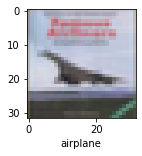

In [33]:
plot_sample(x_test, y_test,3)

In [34]:
classes[y_classes[3]]

'airplane'

In [35]:
classes[y_classes[3]]

'airplane'